<a href="https://colab.research.google.com/github/KaziShahHamza/Wildfire_Prediciton_Research/blob/main/Thesis_Codes_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Load Dataset
import pandas as pd

file_path = '/content/drive/MyDrive/datasets/PREPROCESSED_01_CA_Weather_Fire_Dataset_1984-2025.csv'

# Read the CSV file
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# View top rows
print("First 5 rows:\n", df.head(), "\n")

# Shape of dataset
print("Shape:", df.shape)

# Column names and data types
print("\n Columns and Data Types:\n")
print(df.dtypes)

print("\n Data Types and Info:")
print(df.info())

# Basic stats for numeric columns
print("\n Statistical Summary:\n")
print(df.describe())

# Check missing values
print("\n Missing Values per Column:\n")
print(df.isnull().sum())

# Unique values in each column (useful for categorical data)
print("\n🔹 Unique Value Counts:\n")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# 4. Optional: Display dataframe interactively
# (Only works in Colab — shows scrollable table)
from IPython.display import display
display(df.head(10))


📊 First 5 rows:
          DATE  PRECIPITATION  MAX_TEMP  MIN_TEMP  AVG_WIND_SPEED  \
0  1984-01-01            0.0      79.0      51.0            4.70   
1  1984-01-02            0.0      71.0      46.0            5.59   
2  1984-01-03            0.0      70.0      47.0            5.37   
3  1984-01-04            0.0      76.0      45.0            4.70   
4  1984-01-05            0.0      74.0      49.0            5.14   

   FIRE_START_DAY  YEAR  TEMP_RANGE  WIND_TEMP_RATIO  MONTH  ...  SEASON_Fall  \
0               0  1984        28.0         0.059494      1  ...          0.0   
1               0  1984        25.0         0.078732      1  ...          0.0   
2               0  1984        23.0         0.076714      1  ...          0.0   
3               0  1984        31.0         0.061842      1  ...          0.0   
4               0  1984        25.0         0.069459      1  ...          0.0   

   SEASON_Spring  SEASON_Summer  SEASON_Winter  TEMP_MEAN  IS_RAINY  \
0            0.0

,DATE,PRECIPITATION,MAX_TEMP,MIN_TEMP,AVG_WIND_SPEED,FIRE_START_DAY,YEAR,TEMP_RANGE,WIND_TEMP_RATIO,MONTH,...,SEASON_Fall,SEASON_Spring,SEASON_Summer,SEASON_Winter,TEMP_MEAN,IS_RAINY,WIND_CATEGORY_Extreme,WIND_CATEGORY_High,WIND_CATEGORY_Low,WIND_CATEGORY_Moderate
0,1984-01-01,0.0,79.0,51.0,4.70,0,1984,28.0,0.059494,1,...,0.0,0.0,0.0,1.0,65.0,0,0.0,0.0,1.0,0.0
1,1984-01-02,0.0,71.0,46.0,5.59,0,1984,25.0,0.078732,1,...,0.0,0.0,0.0,1.0,58.5,0,0.0,0.0,0.0,1.0
2,1984-01-03,0.0,70.0,47.0,5.37,0,1984,23.0,0.076714,1,...,0.0,0.0,0.0,1.0,58.5,0,0.0,0.0,0.0,1.0
3,1984-01-04,0.0,76.0,45.0,4.70,0,1984,31.0,0.061842,1,...,0.0,0.0,0.0,1.0,60.5,0,0.0,0.0,1.0,0.0
4,1984-01-05,0.0,74.0,49.0,5.14,0,1984,25.0,0.069459,1,...,0.0,0.0,0.0,1.0,61.5,0,0.0,0.0,0.0,1.0
5,1984-01-06,0.0,65.0,49.0,7.38,0,1984,16.0,0.113538,1,...,0.0,0.0,0.0,1.0,57.0,0,0.0,0.0,0.0,1.0
6,1984-01-07,0.0,59.0,54.0,5.82,0,1984,5.0,0.098644,1,...,0.0,0.0,0.0,1.0,56.5,0,0.0,0.0,0.0,1.0
7,1984-01-08,0.0,59.0,55.0,3.36,0,1984,4.0,0.056949,1,...,0.0,0.0,0.0,1.0,57.0,0,0.0,0.0,1.0,0.0
8,1984-01-09,0.0,61.0,54.0,6.71,0,1984,7.0,0.110000,1,...,0.0,0.0,0.0,1.0,57.5,0,0.0,0.0,0.0,1.0
9,1984-01-10,0.0,70.0,47.0,4.70,0,1984,23.0,0.067143,1,...,0.0,0.0,0.0,1.0,58.5,0,0.0,0.0,1.0,0.0


X shape: (14988, 25)
y shape: (14988,)

Class distribution (0: No Fire, 1: Fire):
 FIRE_START_DAY
0    10017
1     4971
Name: count, dtype: int64 



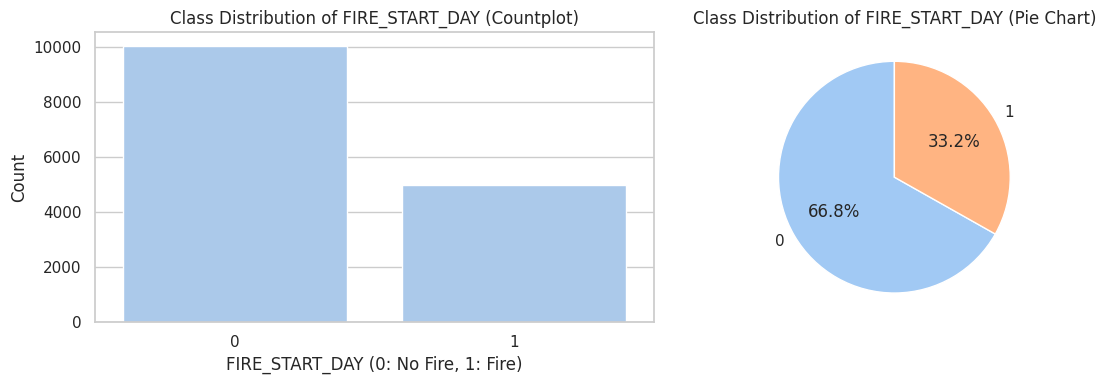

In [ ]:
# Convert the boolean target feature to numerical (0 for False, 1 for True)
df['FIRE_START_DAY'] = df['FIRE_START_DAY'].astype(int)

# Separate features (X) and target (y)
X = df.drop('FIRE_START_DAY', axis=1)
y = df['FIRE_START_DAY']

# Print the shapes of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)

# Show the total number of 0s and 1s
print("\nClass distribution (0: No Fire, 1: Fire):\n", y.value_counts(), "\n")

# Check class balance using a countplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Subplot for countplot
plt.subplot(1, 2, 1)
sns.countplot(x=y)
plt.title('Class Distribution of FIRE_START_DAY (Countplot)')
plt.xlabel('FIRE_START_DAY (0: No Fire, 1: Fire)')
plt.ylabel('Count')

# Subplot for pie chart
plt.subplot(1, 2, 2)
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution of FIRE_START_DAY (Pie Chart)')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Optional: clean style
sns.set(style="whitegrid", palette="pastel")


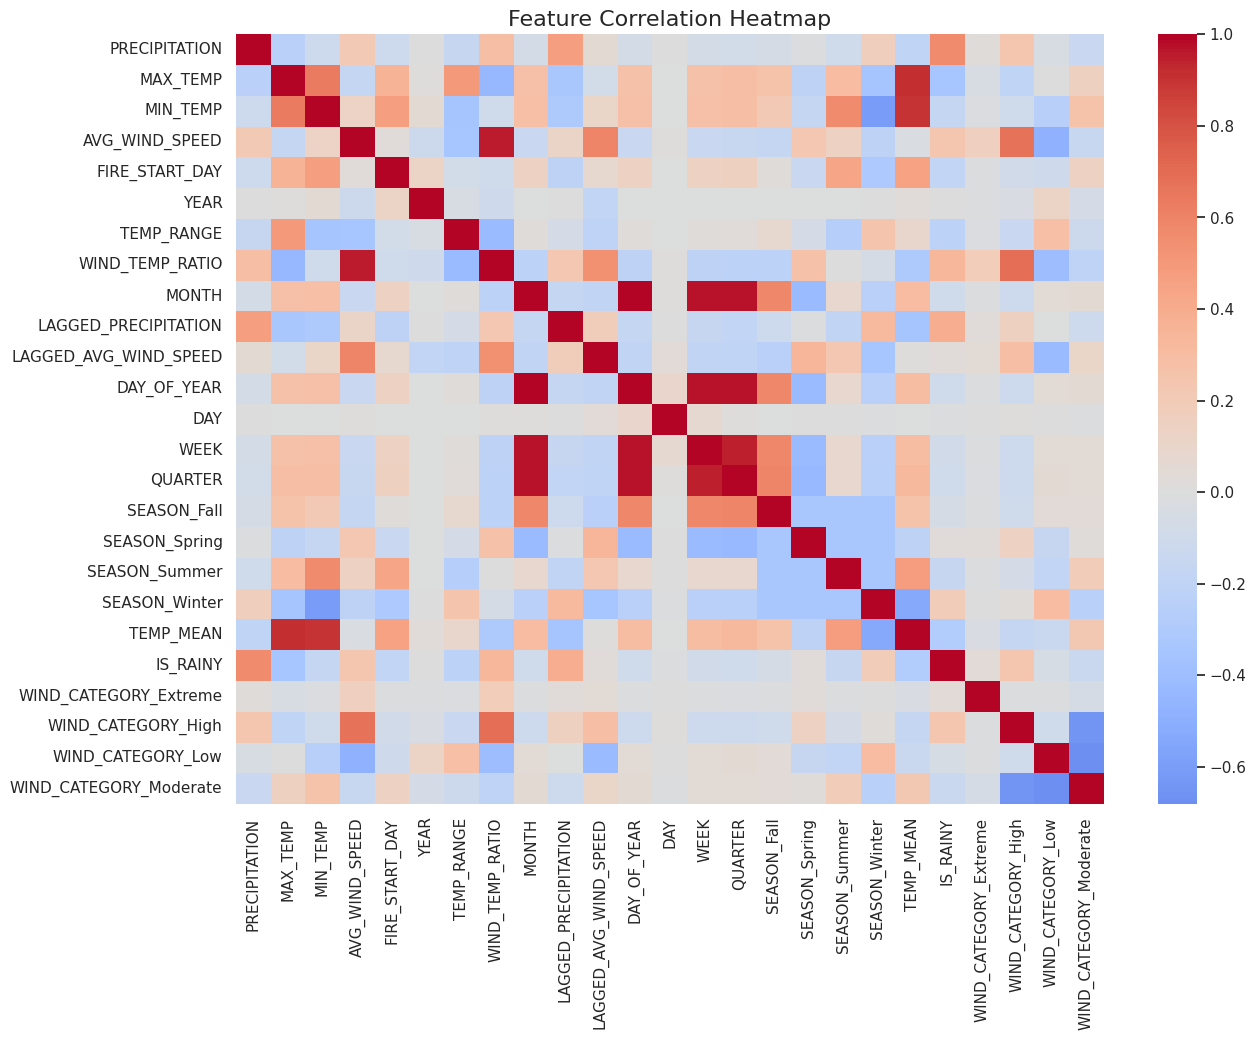

🔸 Features most correlated with Fire Start Day:
 FIRE_START_DAY            1.000000
MIN_TEMP                  0.468025
TEMP_MEAN                 0.460220
SEASON_Summer             0.436256
MAX_TEMP                  0.368317
QUARTER                   0.146896
MONTH                     0.143713
WIND_CATEGORY_Moderate    0.143513
WEEK                      0.143077
DAY_OF_YEAR               0.141905
Name: FIRE_START_DAY, dtype: float64


In [ ]:
plt.figure(figsize=(14,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

# Focus on target correlation
corr_target = corr['FIRE_START_DAY'].sort_values(ascending=False)
print("🔸 Features most correlated with Fire Start Day:\n", corr_target.head(10))


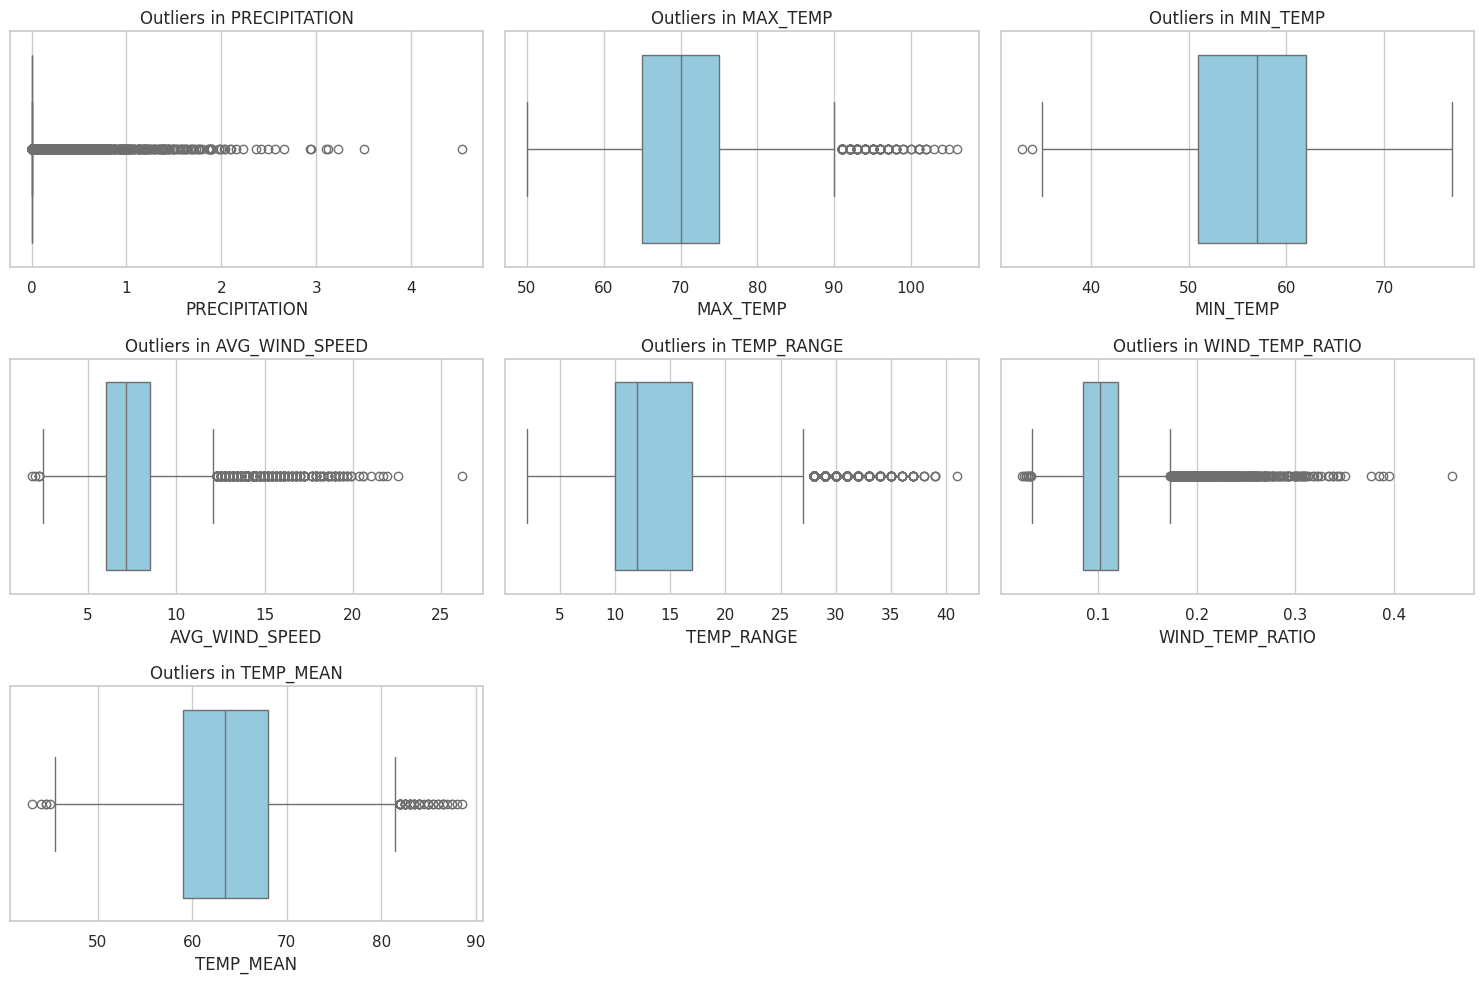

In [ ]:
numeric_cols = ['PRECIPITATION', 'MAX_TEMP', 'MIN_TEMP', 'AVG_WIND_SPEED', 'TEMP_RANGE', 'WIND_TEMP_RATIO', 'TEMP_MEAN']

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Outliers in {col}")
plt.tight_layout()
plt.show()


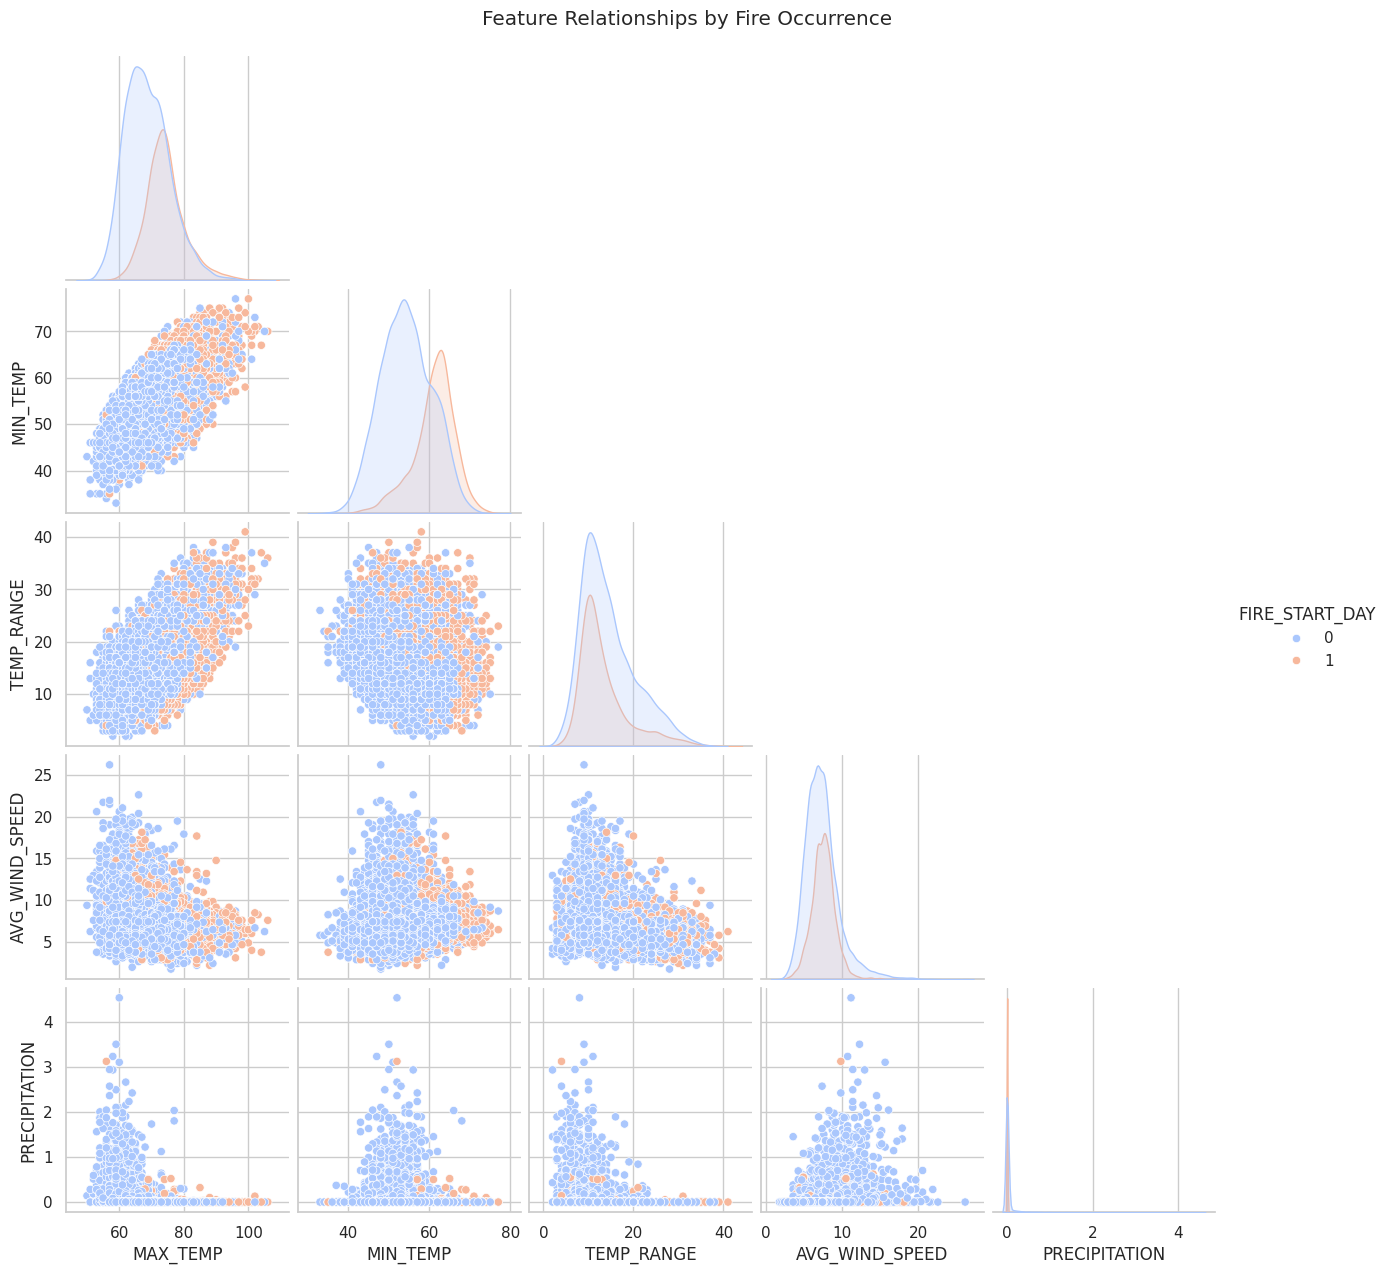

In [ ]:
sns.pairplot(df[['MAX_TEMP', 'MIN_TEMP', 'TEMP_RANGE', 'AVG_WIND_SPEED', 'PRECIPITATION', 'FIRE_START_DAY']],
             hue='FIRE_START_DAY', palette='coolwarm', corner=True)
plt.suptitle("Feature Relationships by Fire Occurrence", y=1.02)
plt.show()


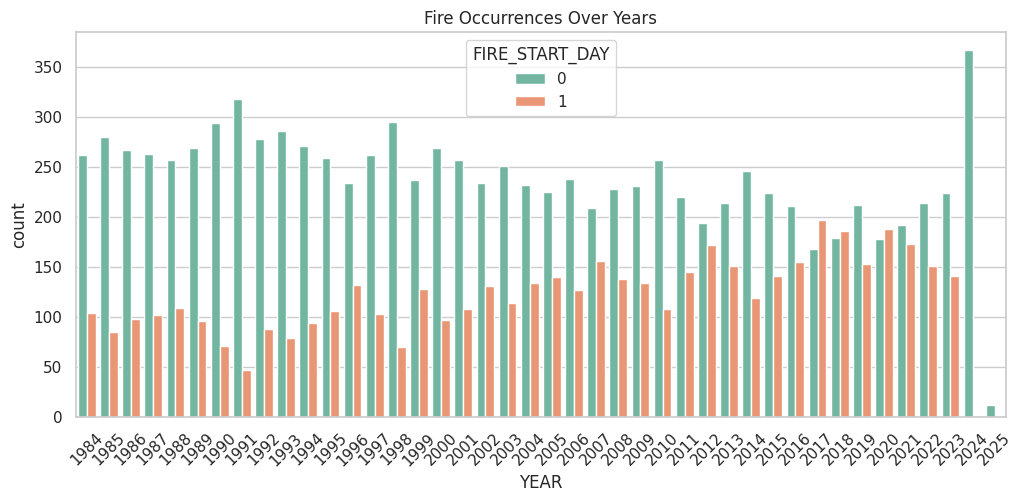

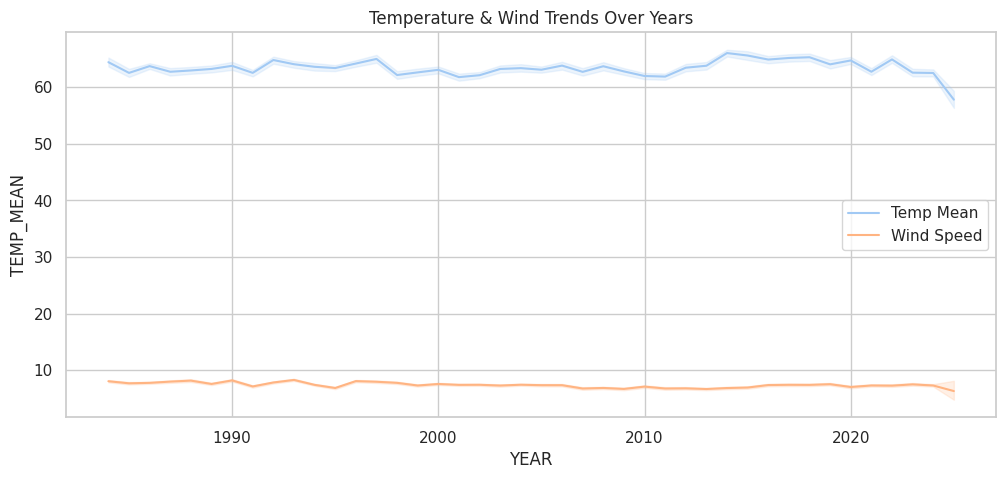

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='YEAR', hue='FIRE_START_DAY', data=df, palette='Set2')
plt.title("Fire Occurrences Over Years")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,5))
sns.lineplot(x='YEAR', y='TEMP_MEAN', data=df, label='Temp Mean')
sns.lineplot(x='YEAR', y='AVG_WIND_SPEED', data=df, label='Wind Speed')
plt.title("Temperature & Wind Trends Over Years")
plt.legend()
plt.show()


/tmp/ipython-input-974074374.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index.get_level_values(0),


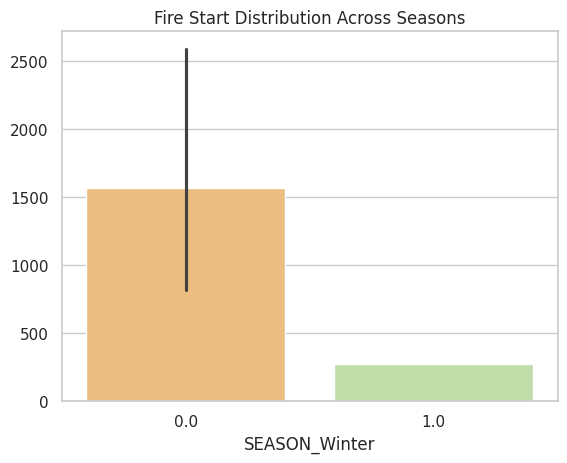

In [ ]:
season_cols = ['SEASON_Winter', 'SEASON_Spring', 'SEASON_Summer', 'SEASON_Fall']
season_counts = df.groupby(season_cols).sum()['FIRE_START_DAY']

sns.barplot(x=season_counts.index.get_level_values(0),
            y=season_counts.values, palette='Spectral')
plt.title("Fire Start Distribution Across Seasons")
plt.show()


In [ ]:
numeric_cols = ['PRECIPITATION', 'MAX_TEMP', 'MIN_TEMP', 'AVG_WIND_SPEED',
                'TEMP_RANGE', 'WIND_TEMP_RATIO', 'TEMP_MEAN']


In [ ]:
def remove_outliers_iqr(df, columns, factor=1.5):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        before = len(df_clean)
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
        after = len(df_clean)
        print(f"{col}: removed {before - after} outliers ({(before - after)/before*100:.2f}%)")
    return df_clean


In [ ]:
df_clean = remove_outliers_iqr(df, numeric_cols)
print(f"✅ Cleaned dataset shape: {df_clean.shape}")


PRECIPITATION: removed 1381 outliers (9.21%)
MAX_TEMP: removed 241 outliers (1.77%)
MIN_TEMP: removed 9 outliers (0.07%)
AVG_WIND_SPEED: removed 363 outliers (2.72%)
TEMP_RANGE: removed 429 outliers (3.30%)
WIND_TEMP_RATIO: removed 195 outliers (1.55%)
TEMP_MEAN: removed 4 outliers (0.03%)
✅ Cleaned dataset shape: (12366, 26)


Before: (14988, 26)
After: (12366, 26)


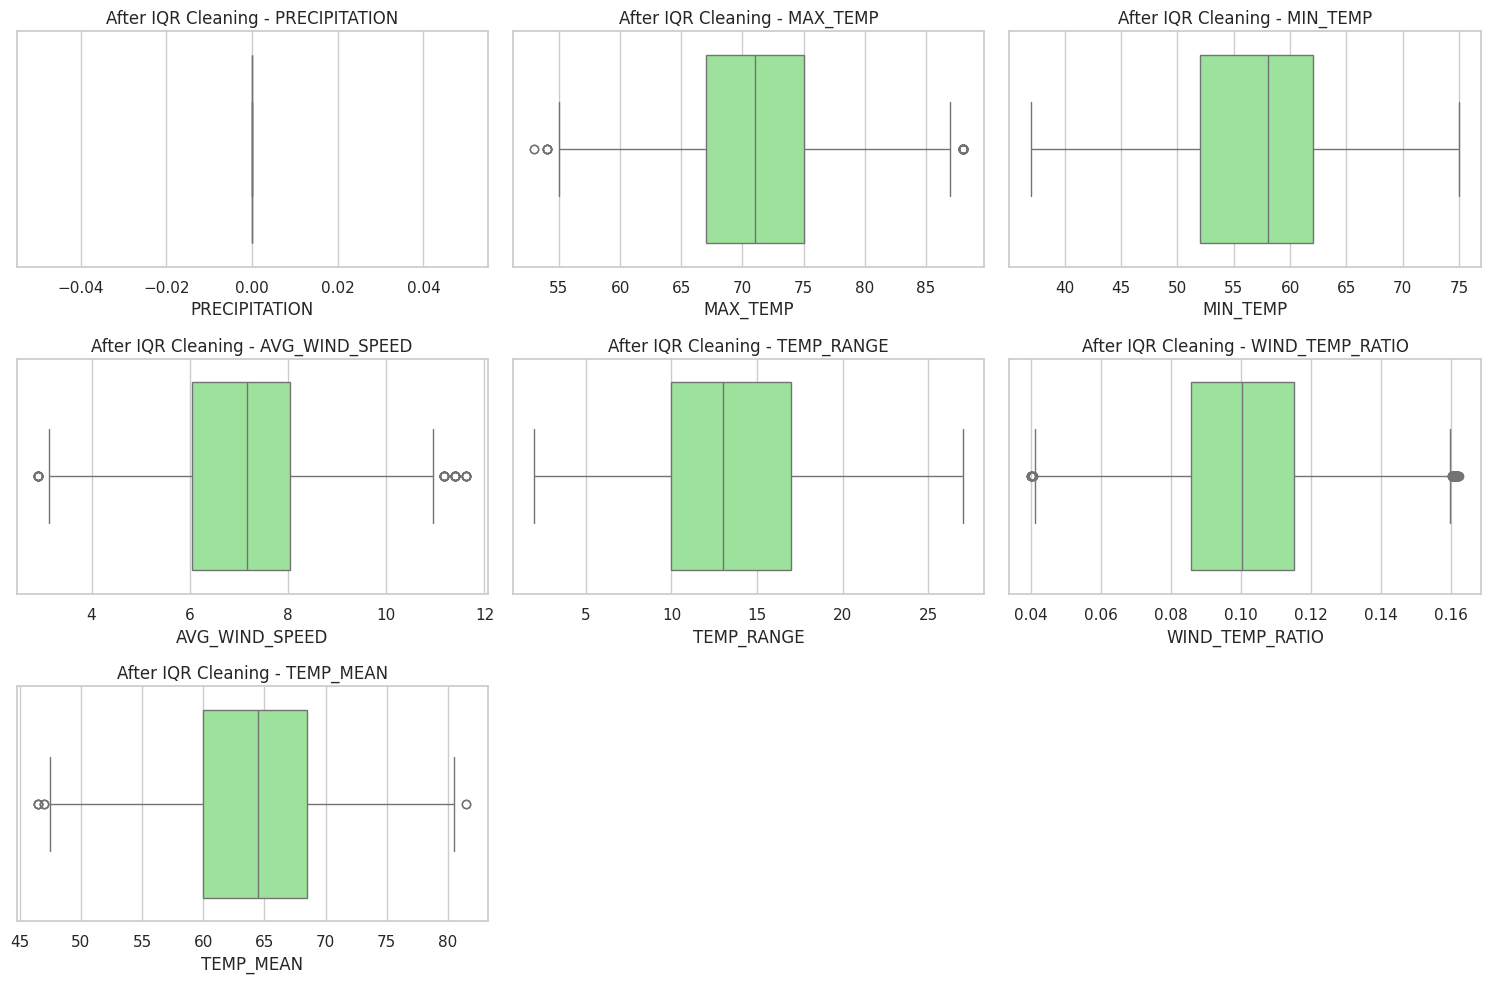

In [ ]:
print("Before:", df.shape)
print("After:", df_clean.shape)

# Optional: visualize again
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_clean[col], color='lightgreen')
    plt.title(f"After IQR Cleaning - {col}")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_clean.drop(['FIRE_START_DAY', 'DATE'], axis=1)
y = df_clean['FIRE_START_DAY']

# Split first
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Then scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)


Train shape: (8656, 24)
Test shape: (3710, 24)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100)
}

results = []

# Train & Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.760916   0.690880  0.629412  0.658715
1        Decision Tree  0.691914   0.576678  0.600000  0.588108
2        Random Forest  0.779245   0.705080  0.683824  0.694289


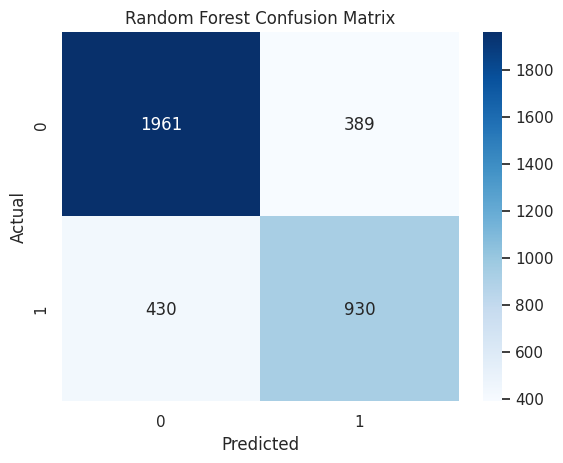


Confusion Matrix (text):
[[1961  389]
 [ 430  930]]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_rf = models["Random Forest"].predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

print("\nConfusion Matrix (text):")
print(cm)

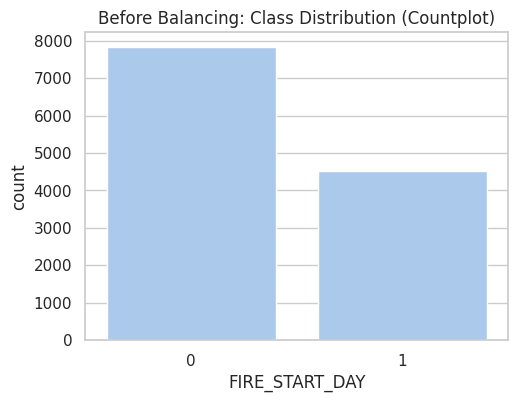

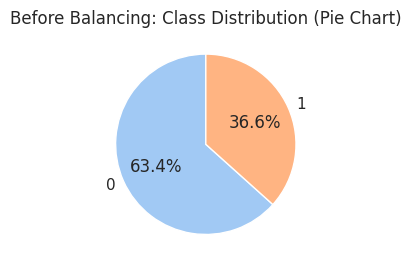

FIRE_START_DAY
0    7834
1    4532
Name: count, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Subplot for countplot
plt.subplot(1, 2, 1)
sns.countplot(x=y)
plt.title("Before Balancing: Class Distribution (Countplot)")
plt.show()

# Subplot for pie chart
plt.subplot(1, 2, 2)
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title("Before Balancing: Class Distribution (Pie Chart)")
plt.show()


print(y.value_counts())

/tmp/ipython-input-1256353626.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette="coolwarm")


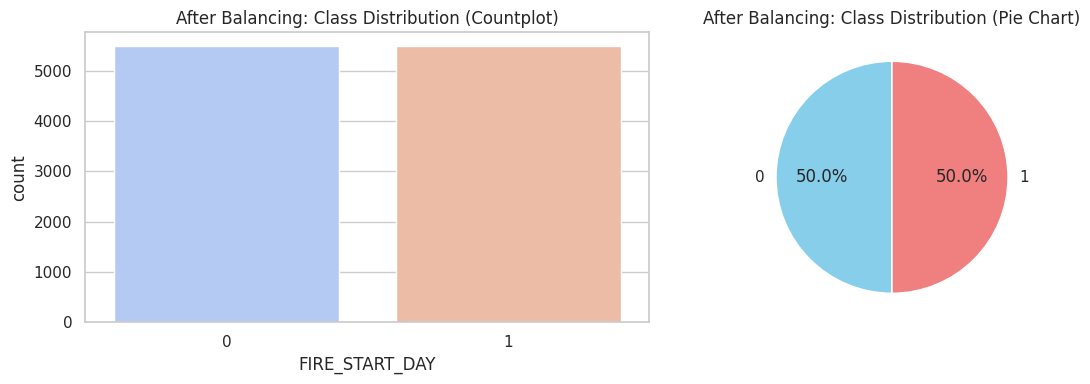

FIRE_START_DAY
0    5484
1    5484
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Show new balance with countplot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(x=y_resampled, palette="coolwarm")
plt.title("After Balancing: Class Distribution (Countplot)")

# Show new balance with pie chart
plt.subplot(1, 2, 2)
plt.pie(y_resampled.value_counts(), labels=y_resampled.value_counts().index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title("After Balancing: Class Distribution (Pie Chart)")

plt.tight_layout()
plt.show()


print(y_resampled.value_counts())

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

params_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'class_weight': [None, 'balanced']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), params_lr, cv=3, scoring='f1')
grid_lr.fit(X_resampled, y_resampled)
print("Best LR Params:", grid_lr.best_params_)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best LR Params: {'C': 10, 'class_weight': None, 'solver': 'liblinear'}


In [ ]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'class_weight': [None, 'balanced']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), params_dt, cv=3, scoring='f1')
grid_dt.fit(X_resampled, y_resampled)
print("Best DT Params:", grid_dt.best_params_)


Best DT Params: {'class_weight': None, 'max_depth': 10, 'min_samples_split': 10}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), params_rf, cv=3, scoring='f1')
grid_rf.fit(X_resampled, y_resampled)
print("Best RF Params:", grid_rf.best_params_)


Best RF Params: {'class_weight': None, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

best_lr = grid_lr.best_estimator_
best_dt = grid_dt.best_estimator_
best_rf = grid_rf.best_estimator_

models = {
    "Logistic Regression": best_lr,
    "Decision Tree": best_dt,
    "Random Forest": best_rf
}

results = []

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.746900   0.628275  0.758088  0.687104
1        Decision Tree  0.731267   0.605462  0.766176  0.676404
2        Random Forest  0.780593   0.680079  0.758088  0.716968



Confusion Matrix for Logistic Regression:
[[1740  610]
 [ 329 1031]]



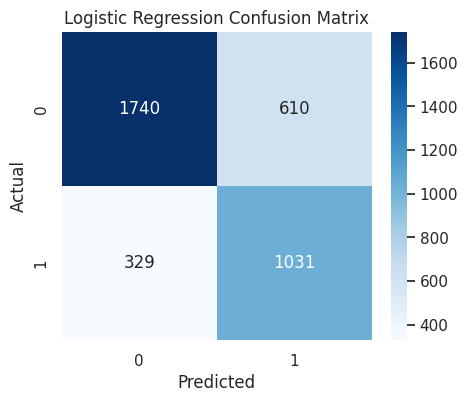

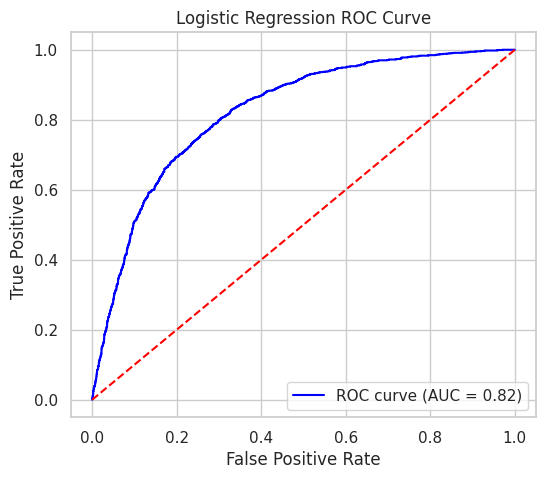


Confusion Matrix for Decision Tree:
[[1671  679]
 [ 318 1042]]



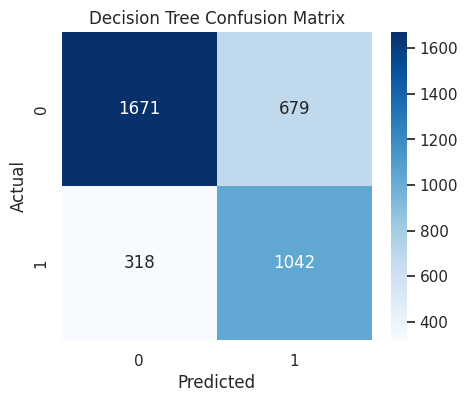

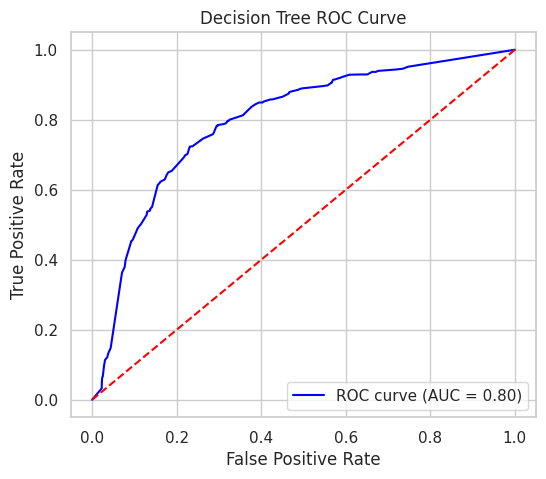


Confusion Matrix for Random Forest:
[[1865  485]
 [ 329 1031]]



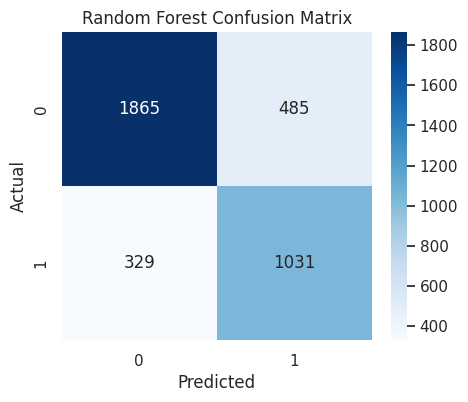

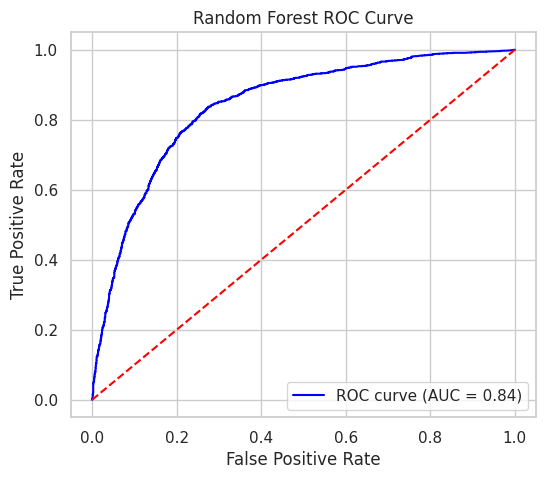

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    print(f"\nConfusion Matrix for {model_name}:\n{cm}\n")

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Plot ROC Curve
def plot_roc_curve(model, X_test, y_test, model_name):
    y_prob = model.predict_proba(X_test)[:,1]  # probability for positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0,1], [0,1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Evaluate all models
for name, model in models.items():
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, name)
    plot_roc_curve(model, X_test, y_test, name)


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
24 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_

Best RF Params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'class_weight': 'balanced'}
Accuracy: 0.7584905660377359
Precision: 0.6281767955801105
Recall: 0.8360294117647059
F1 Score: 0.7173501577287066


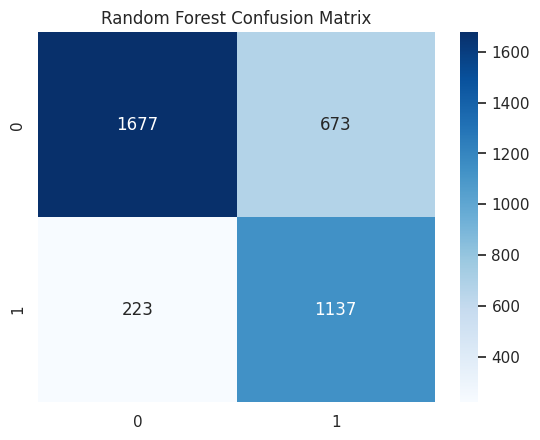

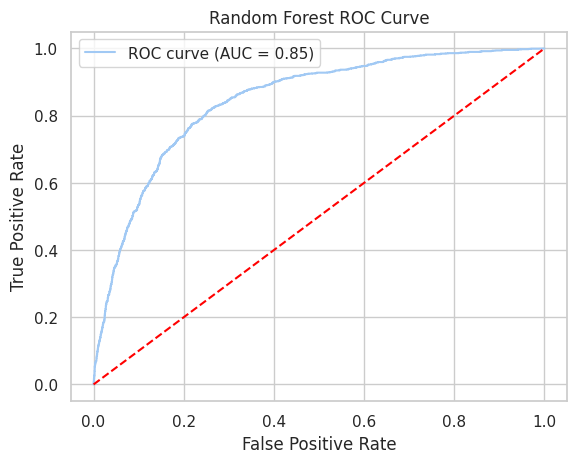

In [ ]:
# Cell 1: Random Forest with Hyperparameter Tuning + Threshold Tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Hyperparameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(rf, rf_param_grid, n_iter=20, cv=3, scoring='f1', random_state=42, n_jobs=-1)
rf_random.fit(X_resampled, y_resampled)

# Best model
best_rf = rf_random.best_estimator_
print("Best RF Params:", rf_random.best_params_)

# Threshold tuning
y_prob_rf = best_rf.predict_proba(X_test)[:,1]
threshold = 0.4  # You can adjust for recall/precision tradeoff
y_pred_rf = (y_prob_rf >= threshold).astype(int)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:21:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost Params: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Accuracy: 0.7199460916442049
Precision: 0.5767575322812052
Recall: 0.8867647058823529
F1 Score: 0.6989278470008693


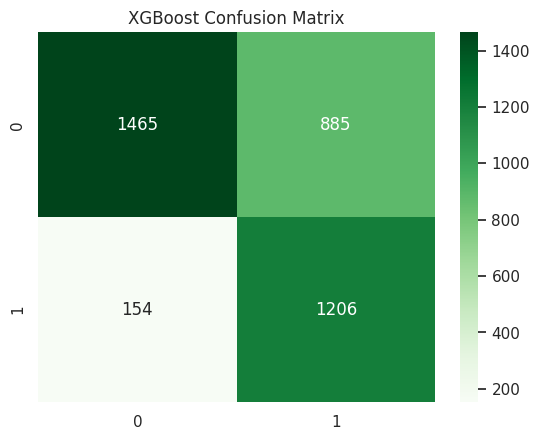

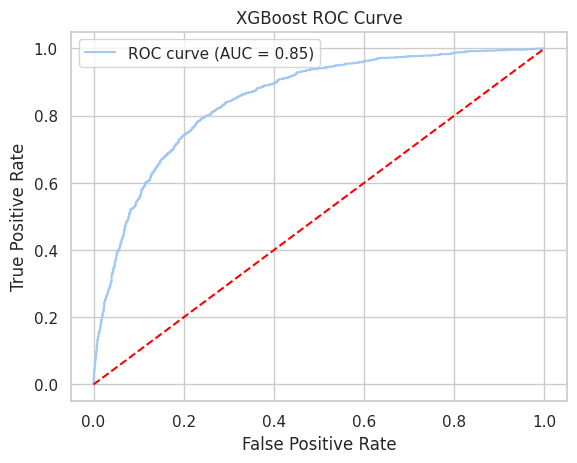

In [ ]:
# Cell 2: XGBoost with RandomizedSearchCV + Threshold Tuning
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_random = RandomizedSearchCV(xgb_model, xgb_param_grid, n_iter=20, cv=3, scoring='f1', random_state=42, n_jobs=-1)
xgb_random.fit(X_resampled, y_resampled)

best_xgb = xgb_random.best_estimator_
print("Best XGBoost Params:", xgb_random.best_params_)

# Threshold tuning
y_prob_xgb = best_xgb.predict_proba(X_test)[:,1]
threshold = 0.4
y_pred_xgb = (y_prob_xgb >= threshold).astype(int)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend()
plt.show()


[LightGBM] [Info] Number of positive: 5484, number of negative: 5484
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2771
[LightGBM] [Info] Number of data points in the train set: 10968, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

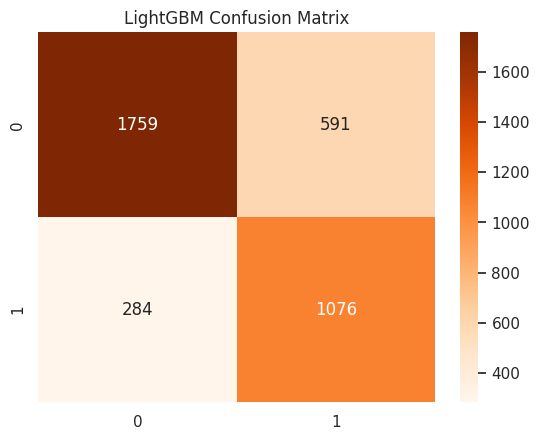

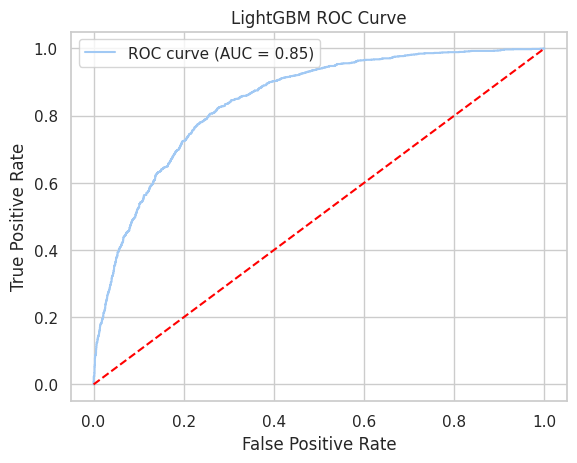

In [ ]:
# Cell 3: LightGBM with RandomizedSearchCV + Threshold Tuning
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(random_state=42)

lgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, -1],
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

lgb_random = RandomizedSearchCV(lgb_model, lgb_param_grid, n_iter=20, cv=3, scoring='f1', random_state=42, n_jobs=-1)
lgb_random.fit(X_resampled, y_resampled)

best_lgb = lgb_random.best_estimator_
print("Best LightGBM Params:", lgb_random.best_params_)

# Threshold tuning
y_prob_lgb = best_lgb.predict_proba(X_test)[:,1]
threshold = 0.4
y_pred_lgb = (y_prob_lgb >= threshold).astype(int)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Precision:", precision_score(y_test, y_pred_lgb))
print("Recall:", recall_score(y_test, y_pred_lgb))
print("F1 Score:", f1_score(y_test, y_pred_lgb))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("LightGBM Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_lgb)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LightGBM ROC Curve')
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:31:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 5484, number of negative: 5484
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2771
[LightGBM] [Info] Number of data points in the train set: 10968, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

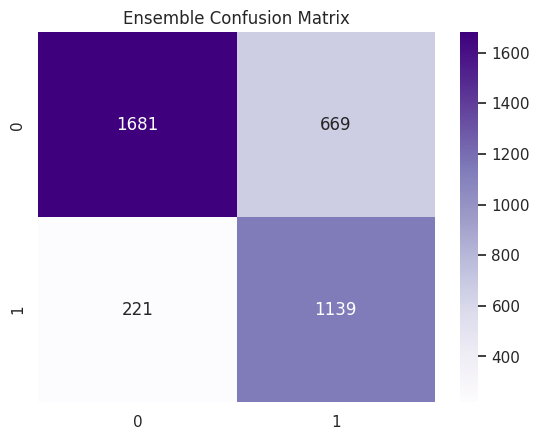

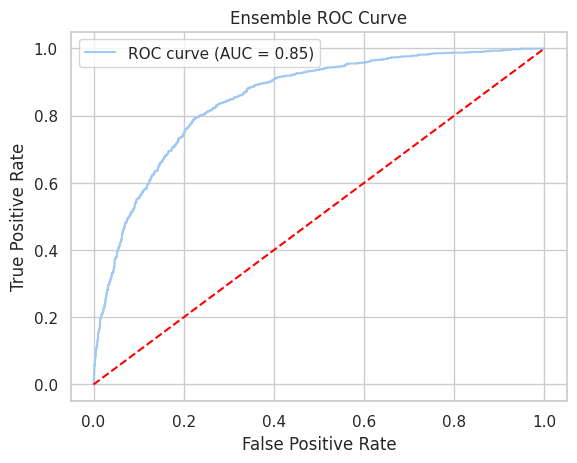

In [ ]:
# Cell 4: Ensemble Voting Classifier (Random Forest + XGBoost + LightGBM)
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[('rf', best_rf), ('xgb', best_xgb), ('lgb', best_lgb)],
    voting='soft'  # uses predicted probabilities
)
ensemble.fit(X_resampled, y_resampled)

# Threshold tuning
y_prob_ensemble = ensemble.predict_proba(X_test)[:,1]
threshold = 0.4
y_pred_ensemble = (y_prob_ensemble >= threshold).astype(int)

# Metrics
print("Ensemble Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("Precision:", precision_score(y_test, y_pred_ensemble))
print("Recall:", recall_score(y_test, y_pred_ensemble))
print("F1 Score:", f1_score(y_test, y_pred_ensemble))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Ensemble Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_ensemble)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ensemble ROC Curve')
plt.legend()
plt.show()


In [ ]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.5 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Logistic Regression Params: {'penalty': 'l1', 'C': 100}
Accuracy: 0.7140
Precision: 0.5727
Recall: 0.8654
F1 Score: 0.6893

Confusion Matrix:
 [[1472  878]
 [ 183 1177]]


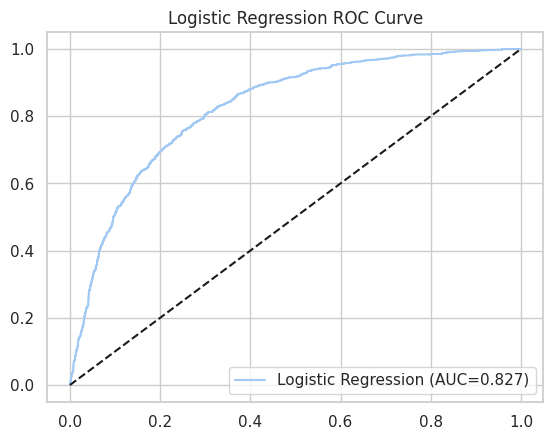

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', max_iter=500, class_weight='balanced', random_state=42)

lr_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

lr_random = RandomizedSearchCV(lr, lr_params, n_iter=6, cv=3, scoring='f1', random_state=42)
lr_random.fit(X_train, y_train)

best_lr = lr_random.best_estimator_
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]

# Threshold tuning
threshold = 0.4
y_pred_lr = (y_prob_lr >= threshold).astype(int)

lr_acc = accuracy_score(y_test, y_pred_lr)
lr_prec = precision_score(y_test, y_pred_lr)
lr_rec = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

print("Best Logistic Regression Params:", lr_random.best_params_)
print(f"Accuracy: {lr_acc:.4f}")
print(f"Precision: {lr_prec:.4f}")
print(f"Recall: {lr_rec:.4f}")
print(f"F1 Score: {lr_f1:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC={roc_auc_score(y_test, y_prob_lr):.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.legend(); plt.title("Logistic Regression ROC Curve"); plt.show()


Best Decision Tree Params: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'gini'}
Accuracy: 0.7210
Precision: 0.5800
Recall: 0.8662
F1 Score: 0.6948

Confusion Matrix:
 [[1497  853]
 [ 182 1178]]


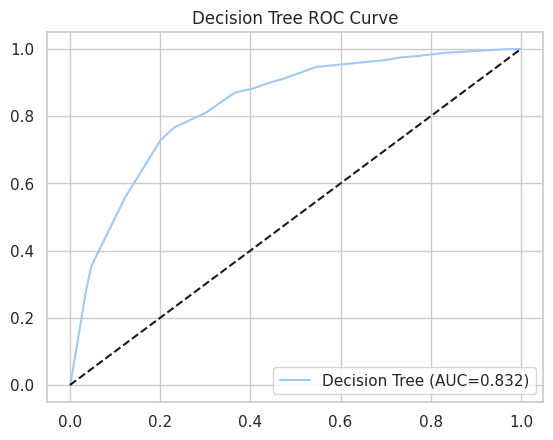

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

dt_params = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_random = RandomizedSearchCV(dt, dt_params, n_iter=10, cv=3, scoring='f1', n_jobs=-1, random_state=42)
dt_random.fit(X_train, y_train)

best_dt = dt_random.best_estimator_
y_prob_dt = best_dt.predict_proba(X_test)[:, 1]

# Threshold tuning
threshold = 0.4
y_pred_dt = (y_prob_dt >= threshold).astype(int)

dt_acc = accuracy_score(y_test, y_pred_dt)
dt_prec = precision_score(y_test, y_pred_dt)
dt_rec = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

print("Best Decision Tree Params:", dt_random.best_params_)
print(f"Accuracy: {dt_acc:.4f}")
print(f"Precision: {dt_prec:.4f}")
print(f"Recall: {dt_rec:.4f}")
print(f"F1 Score: {dt_f1:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_dt)
plt.plot(fpr, tpr, label=f'Decision Tree (AUC={roc_auc_score(y_test, y_prob_dt):.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.legend(); plt.title("Decision Tree ROC Curve"); plt.show()


Best CatBoost Params: {'subsample': 0.9, 'learning_rate': 0.01, 'l2_leaf_reg': 5, 'iterations': 300, 'depth': 10, 'border_count': 64}
Accuracy: 0.7790
Precision: 0.6628
Recall: 0.8081
F1 Score: 0.7283

Confusion Matrix:
 [[1791  559]
 [ 261 1099]]


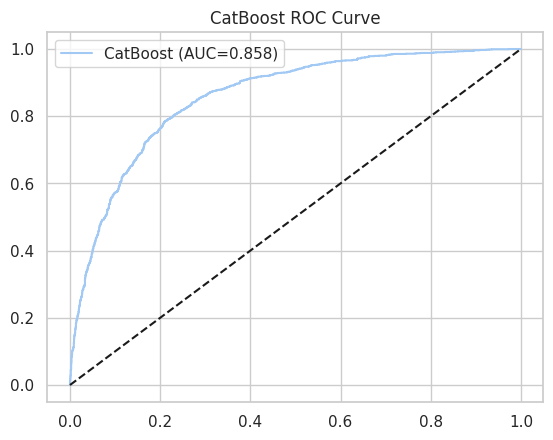

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ----- CatBoost -----
cat = CatBoostClassifier(verbose=0, random_state=42)

cat_params = {
    'iterations': [200, 300, 500],
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 64, 128],
    'subsample': [0.7, 0.9, 1.0]
}

cat_random = RandomizedSearchCV(cat, cat_params, n_iter=15, cv=3, scoring='f1', n_jobs=-1, random_state=42)
cat_random.fit(X_train, y_train)

best_cat = cat_random.best_estimator_

# ----- Threshold tuning -----
y_prob = best_cat.predict_proba(X_test)[:, 1]
threshold = 0.4
y_pred = (y_prob >= threshold).astype(int)

# ----- Evaluation -----
cat_acc = accuracy_score(y_test, y_pred)
cat_prec = precision_score(y_test, y_pred)
cat_rec = recall_score(y_test, y_pred)
cat_f1 = f1_score(y_test, y_pred)

print("Best CatBoost Params:", cat_random.best_params_)
print(f"Accuracy: {cat_acc:.4f}")
print(f"Precision: {cat_prec:.4f}")
print(f"Recall: {cat_rec:.4f}")
print(f"F1 Score: {cat_f1:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'CatBoost (AUC={roc_auc_score(y_test, y_prob):.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.legend(); plt.title("CatBoost ROC Curve"); plt.show()


GaussianNB Performance:
Accuracy: 0.6943
Precision: 0.5533
Recall: 0.8632
F1 Score: 0.6743

Confusion Matrix:
 [[1402  948]
 [ 186 1174]]


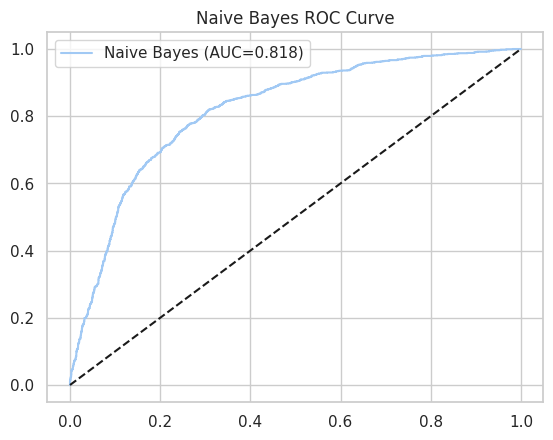

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ----- Train NB -----
nb = GaussianNB()
nb.fit(X_train, y_train)

# ----- Predictions -----
y_prob_nb = nb.predict_proba(X_test)[:, 1]

# Threshold tuning
threshold = 0.4
y_pred_nb = (y_prob_nb >= threshold).astype(int)

# ----- Evaluation -----
nb_acc = accuracy_score(y_test, y_pred_nb)
nb_prec = precision_score(y_test, y_pred_nb)
nb_rec = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)

print("GaussianNB Performance:")
print(f"Accuracy: {nb_acc:.4f}")
print(f"Precision: {nb_prec:.4f}")
print(f"Recall: {nb_rec:.4f}")
print(f"F1 Score: {nb_f1:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

# ----- ROC Curve -----
fpr, tpr, _ = roc_curve(y_test, y_prob_nb)
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC={roc_auc_score(y_test, y_prob_nb):.3f})')
plt.plot([0,1],[0,1],'k--')
plt.legend(); plt.title("Naive Bayes ROC Curve"); plt.show()


Fitting 3 folds for each of 10 candidates, totalling 30 fits

Optimal Threshold: 0.544 (Auto-selected for best F1)

Best MLP Params: {'solver': 'adam', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (100, 50, 25), 'alpha': 0.0001, 'activation': 'relu'}
Accuracy: 0.7704
Precision: 0.6582
Recall: 0.7772
F1 Score: 0.7127

Confusion Matrix:
 [[1801  549]
 [ 303 1057]]


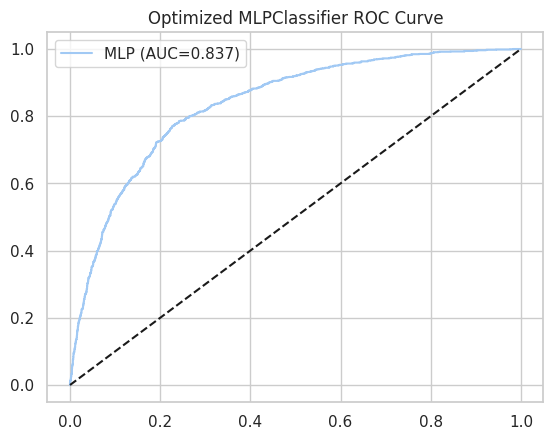

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# ✅ 1. Scale features (important for MLP)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ 2. Balance dataset (SMOTE)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# ✅ 3. Define model & params (deeper nets + smaller learning rate)
mlp = MLPClassifier(max_iter=1000, early_stopping=True, random_state=42)

mlp_params = {
    'hidden_layer_sizes': [(128, 64, 32), (100, 50, 25), (64, 32), (150, 100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate_init': [0.0005, 0.001, 0.005],
    'alpha': [0.0001, 0.001],
}

# ✅ 4. RandomizedSearchCV
mlp_random = RandomizedSearchCV(
    mlp, mlp_params, n_iter=10, cv=3, scoring='f1',
    n_jobs=-1, random_state=42, verbose=1
)
mlp_random.fit(X_train_res, y_train_res)

best_mlp = mlp_random.best_estimator_

# ✅ 5. Get prediction probabilities
y_prob_mlp = best_mlp.predict_proba(X_test_scaled)[:, 1]

# ✅ 6. Find best threshold dynamically (maximize F1)
prec, rec, thresh = precision_recall_curve(y_test, y_prob_mlp)
f1_scores = 2 * (prec * rec) / (prec + rec)
best_idx = np.argmax(f1_scores)
best_threshold = thresh[best_idx]

print(f"\nOptimal Threshold: {best_threshold:.3f} (Auto-selected for best F1)\n")

# Apply threshold
y_pred_mlp = (y_prob_mlp >= best_threshold).astype(int)

# ✅ 7. Evaluation
mlp_acc = accuracy_score(y_test, y_pred_mlp)
mlp_prec = precision_score(y_test, y_pred_mlp)
mlp_rec = recall_score(y_test, y_pred_mlp)
mlp_f1 = f1_score(y_test, y_pred_mlp)

print("Best MLP Params:", mlp_random.best_params_)
print(f"Accuracy: {mlp_acc:.4f}")
print(f"Precision: {mlp_prec:.4f}")
print(f"Recall: {mlp_rec:.4f}")
print(f"F1 Score: {mlp_f1:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))

# ✅ 8. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_mlp)
plt.plot(fpr, tpr, label=f'MLP (AUC={roc_auc_score(y_test, y_prob_mlp):.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.title("Optimized MLPClassifier ROC Curve")
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



💥 Final Stacked Ensemble Results:
Accuracy:  0.7757
Precision: 0.6841
Recall:    0.7213
F1 Score:  0.7022

Confusion Matrix:
 [[1897  453]
 [ 379  981]]


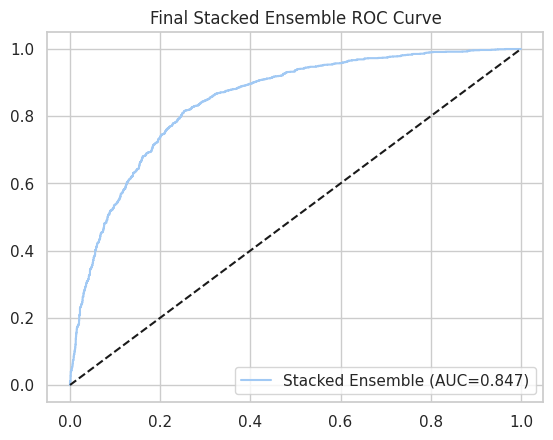

In [ ]:
# ==============================
# 📦 Imports
# ==============================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)
from imblearn.over_sampling import SMOTE

# ==============================
# ⚙️ Data Preparation
# ==============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# ==============================
# 🧠 Base Models (your best ones)
# ==============================
rf_best = RandomForestClassifier(
    n_estimators=100, max_depth=20, max_features='log2',
    min_samples_split=5, min_samples_leaf=1, class_weight='balanced',
    random_state=42
)

lgbm_best = LGBMClassifier(
    n_estimators=300, num_leaves=70, max_depth=10,
    learning_rate=0.05, subsample=1.0, colsample_bytree=0.8,
    random_state=42
)

cat_best = CatBoostClassifier(
    n_estimators=300, depth=10, learning_rate=0.05,
    verbose=0, random_state=42
)

xgb_best = XGBClassifier(
    n_estimators=100, max_depth=10, learning_rate=0.01,
    subsample=1.0, colsample_bytree=0.8,
    use_label_encoder=False, eval_metric='logloss', random_state=42
)

mlp_best = MLPClassifier(
    hidden_layer_sizes=(100, 50, 25), activation='relu', solver='adam',
    learning_rate_init=0.001, alpha=0.0001,
    max_iter=1000, early_stopping=True, random_state=42
)

lr_best = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
dt_best = DecisionTreeClassifier(max_depth=20, random_state=42)
nb_best = GaussianNB()

# ==============================
# 🧩 Stacking Ensemble
# ==============================
stack_model = StackingClassifier(
    estimators=[
        ('rf', rf_best),
        ('lgbm', lgbm_best),
        ('cat', cat_best),
        ('xgb', xgb_best),
        ('mlp', mlp_best),
        ('lr', lr_best),
        ('dt', dt_best),
        ('nb', nb_best)
    ],
    final_estimator=LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    cv=5,
    n_jobs=-1,
    passthrough=True  # include original features too
)

# ==============================
# 🚀 Train & Predict
# ==============================
stack_model.fit(X_train_bal, y_train_bal)
y_prob_stack = stack_model.predict_proba(X_test_scaled)[:, 1]
y_pred_stack = (y_prob_stack >= 0.5).astype(int)

# ==============================
# 📊 Evaluation
# ==============================
acc = accuracy_score(y_test, y_pred_stack)
prec = precision_score(y_test, y_pred_stack)
rec = recall_score(y_test, y_pred_stack)
f1 = f1_score(y_test, y_pred_stack)

print("\n💥 Final Stacked Ensemble Results:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))

# ==============================
# 📈 ROC Curve
# ==============================
fpr, tpr, _ = roc_curve(y_test, y_prob_stack)
plt.plot(fpr, tpr, label=f'Stacked Ensemble (AUC={roc_auc_score(y_test, y_prob_stack):.3f})')
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.title("Final Stacked Ensemble ROC Curve")
plt.show()
